#  Exploratory Data Analysis
 
 
 


In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Clean Obfuscated ATM Data.csv')
df['Terminal DateTime'] = pd.to_datetime(df['Terminal DateTime']) 
df.set_index(df['Terminal DateTime'], inplace=True)
df = df.loc['2020-8-01':'2021-7-31'] # only the time where you have whole months

/tmp/ipykernel_130452/2929528950.py:9: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df.loc['2020-8-01':'2021-7-31'] # only the time where you have whole months


### How large is our data?

In [241]:

print(f'Sample Start: {df.index.min()}')
print(f'Sample End: {df.index.max()}')
print(f'Total Days: {(df.index.max() - df.index.min()).days}')

Sample Start: 2020-08-01 01:04:28
Sample End: 2021-07-31 22:27:20
Total Days: 364


In [242]:
transaction_df = df[df['fee_charged'] != 0.0] # A subset of all the valid transactions
transaction_df.sort_index(inplace=True)
transaction_df.head()


/home/parkerburchett/.local/lib/python3.8/site-packages/pandas/core/frame.py:6388: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


,Customer_id,Terminal DateTime,TranType,Term Seq.,Response,Issuer,amount_requested,amount_dispensed,fee_requested,fee_charged
Terminal DateTime,,,,,,,,,,
2020-08-01 13:13:54,5778876187126349291,2020-08-01 13:13:54,W/D,760.0,Liable,MS0,200,200.0,3.0,3.0
2020-08-01 13:14:55,5778876187126349291,2020-08-01 13:14:55,W/D,761.0,Liable,MS0,200,200.0,3.0,3.0
2020-08-01 22:17:24,667368338206046387,2020-08-01 22:17:24,W/D,762.0,Liable,MS0,200,200.0,3.0,3.0
2020-08-02 00:45:00,5160764800030931563,2020-08-02 00:45:00,W/D,763.0,Approved,MS0,20,20.0,3.0,3.0
2020-08-02 12:58:24,7270367318620547036,2020-08-02 12:58:24,W/D,766.0,Liable,PLS,200,200.0,3.0,3.0


In [243]:
print(df.shape)
print(transaction_df.shape)

(2536, 10)
(1445, 10)


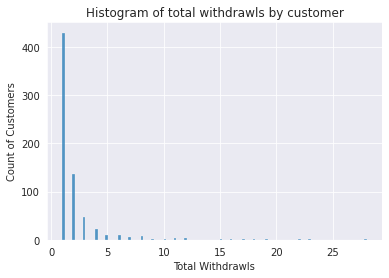

In [244]:
repeat_customers = transaction_df['Customer_id'].value_counts().values
sns.histplot(repeat_customers)
plt.title("Histogram of total withdrawls by customer")
plt.ylabel('Count of Customers')
plt.xlabel('Total Withdrawls')
plt.show()


Most customer only use the ATM once, but there are a handful of customers that have used the ATM many ones

In [245]:
total_unique_customers = len(transaction_df['Customer_id'].unique())

number_of_5_plus_repeat_customers = np.sum(transaction_df['Customer_id'].value_counts() >=5)
number_of_5_plus_repeat_customers

print(f'Percent of customers that have used the ATM 5+ times: {round((number_of_5_plus_repeat_customers/total_unique_customers)*100,2)}%')

Percent of customers that have used the ATM 5+ times: 7.55%


In [246]:
customer_group_df = transaction_df.groupby('Customer_id').sum().sort_values(by='fee_charged', ascending=False)
high_freqency_customers = customer_group_df[customer_group_df['fee_charged'] >= 5*3].index
high_freqency_customers[:3]

Int64Index([6151147783377518261, 3187606172919100028, 1079720515450814901], dtype='int64', name='Customer_id')

# Is there any difference between High Frequency and low frequencey Customers

I picked customers with 5 or greater with drawls as high frequency.

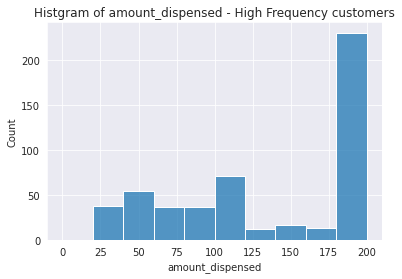

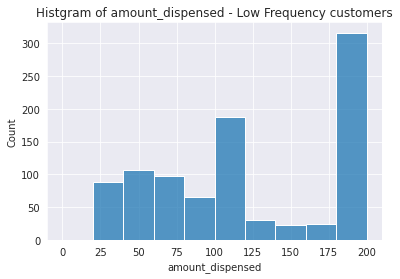

In [247]:
high_frequency_df = transaction_df[transaction_df['Customer_id'].isin(high_freqency_customers)]
low_frequency_df  = transaction_df[~transaction_df['Customer_id'].isin(high_freqency_customers)]

plt.title('Histgram of amount_dispensed - High Frequency customers')
sns.histplot(high_frequency_df['amount_dispensed'], bins=[a for a in range(0,220,20)])
plt.show()

plt.title('Histgram of amount_dispensed - Low Frequency customers')
sns.histplot(low_frequency_df['amount_dispensed'], bins=[a for a in range(0,220,20)])
plt.show()

Low frequency customers tend to take out smaller amounts per transaction

# How did amount dispensed change over time?

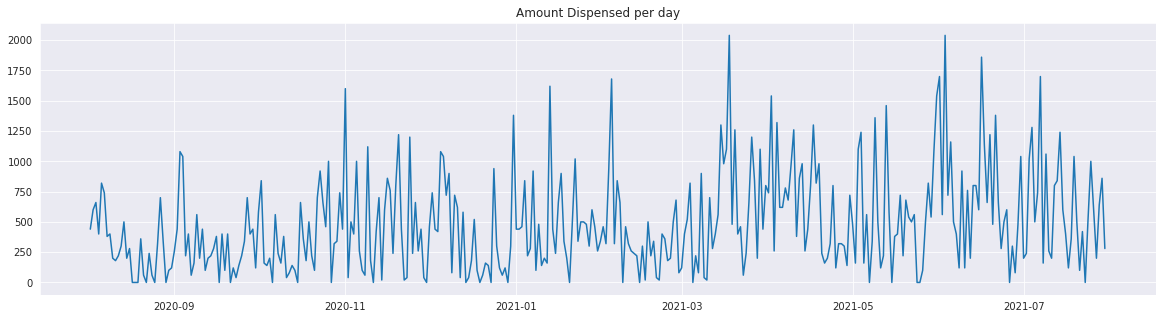

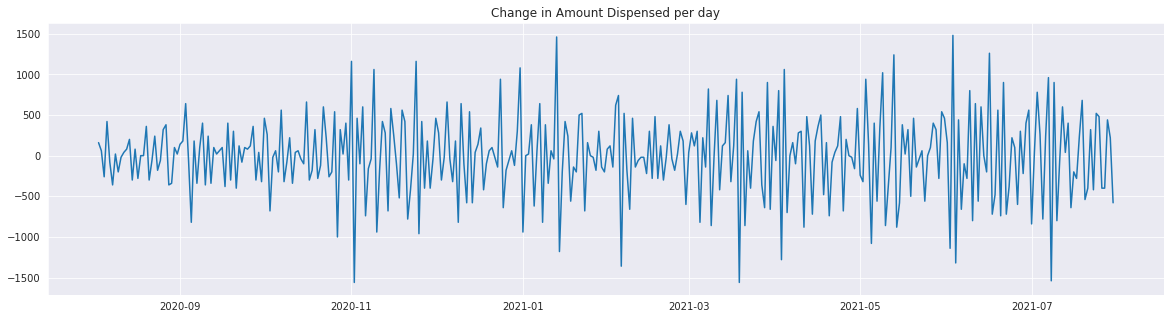

In [248]:
plt.figure(figsize=(20, 5))
plt.plot(transaction_df['amount_dispensed'].resample('D').sum()[1:-1]) # clip the first and lat days since they are only part days
plt.title('Amount Dispensed per day')
plt.show() 


plt.figure(figsize=(20, 5))
daily_difference = (transaction_df['amount_dispensed'].resample('D').sum()[1:-1]).diff()
plt.plot(daily_difference)
plt.title('Change in Amount Dispensed per day')
plt.show() 

Add a scatter plot where x = amount at time t and y = amount at time t+1 all the way up to t+n


You can have a filter where each value = 25% of t-3 50% t-2 and 25% t-1 = make that a time series

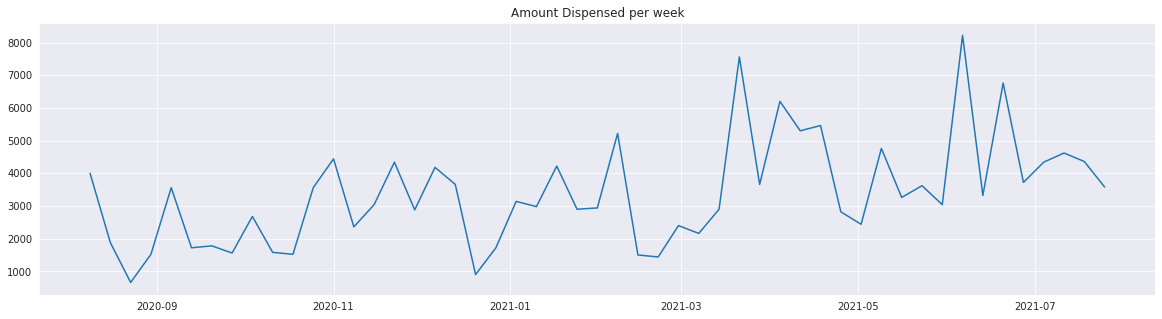

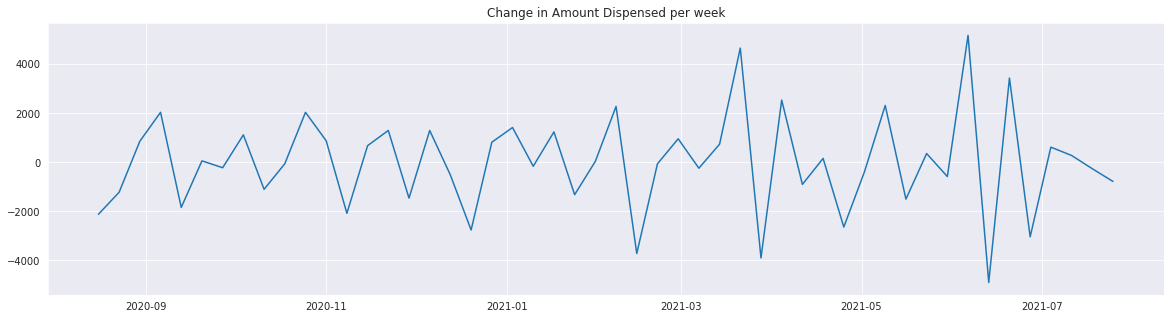

In [249]:
plt.figure(figsize=(20, 5))
plt.plot(transaction_df['amount_dispensed'].resample('w').sum()[1:-1]) # clip the first and lat days since they are only part days
plt.title('Amount Dispensed per week')
plt.show() 


plt.figure(figsize=(20, 5))
weekly_difference = (transaction_df['amount_dispensed'].resample('w').sum()[1:-1]).diff()
plt.plot(weekly_difference)
plt.title('Change in Amount Dispensed per week')
plt.show() 

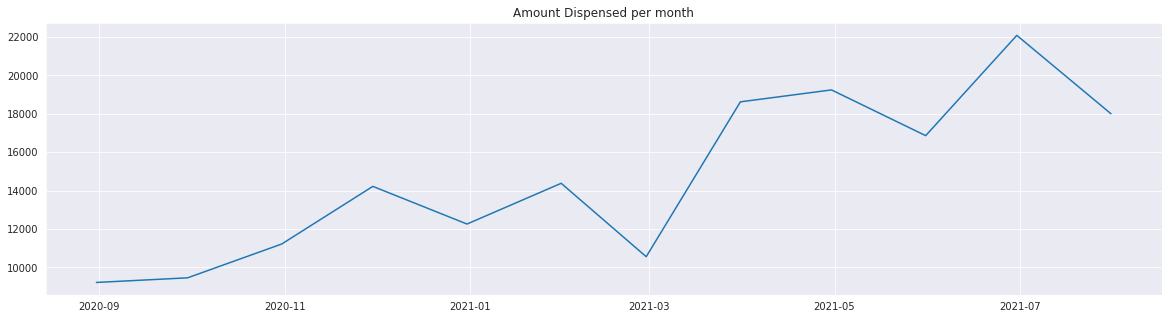

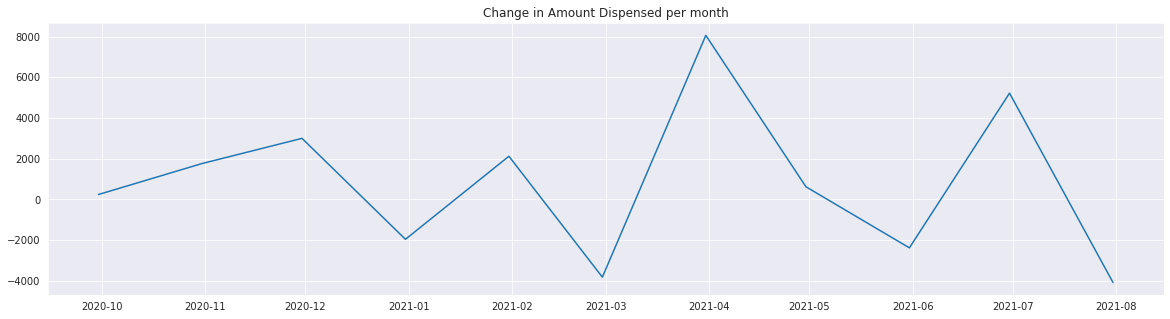

In [250]:
plt.figure(figsize=(20, 5))
plt.plot(transaction_df['amount_dispensed'].resample('m').sum()) 
plt.title('Amount Dispensed per month')
plt.show() 


plt.figure(figsize=(20, 5))
monthly_difference = (transaction_df['amount_dispensed'].resample('m').sum()).diff()
plt.plot(monthly_difference)
plt.title('Change in Amount Dispensed per month')
plt.show() 

# This data is very noisey

Looking at the graphs there seems to be an upward trend in amount dispensed in the last year or so and the daily varience has increased as well. This makes since because the ATM is at a hotel and is more busy now that Washington state is relaxing the pandemic restrictions. 

In [251]:
mean = round(transaction_df['amount_dispensed'].resample('D').sum().mean(),2)
std = round(transaction_df['amount_dispensed'].resample('D').sum().std(),2)

print(f'Average cash withdrawn was ${mean}.')
print(f'STD of daily cash withdrawn was ${std}.')


Average cash withdrawn was $482.52.
STD of daily cash withdrawn was $404.56.


Weekday only has a neglible influence on the daily amount of cash dispensed with Monday, Thrusday and Friday having slighly greater than average amount dispensed.

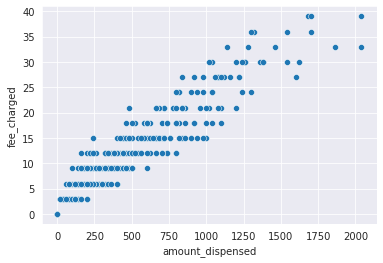

In [252]:
daily_transactions = transaction_df.resample('D').sum()[1:-1]
sns.scatterplot(x='amount_dispensed', y='fee_charged', data=daily_transactions)
plt.show()

There is a positive corrilation between amount dispensed and the fee charged. The varience tends to increase as the amount dispensed increases. This makes senes it is what you would expect since each customer can withdrawl different amounts of cash.

# Conclusions
1. The monthly total amount dispensed has about doubled in the last year from ~$10,000 to about $20,000
2. There appears to be a lot of randomness in the daily amount dispensed with the variance increasing in the last few months.
3. The variance of fee charged increases with the amount dispensed.
4. Low frequency customers tend to take out on average less than high frequency customers.
5. The Lifetime transaction count by customer follows an exponential distribution where there are a handful of regular customers and a much larger group of people who only use the ATM once or twice. This again matches intuition since the hotel has regulars who work there and there are a lot of people who are only there for a few nights.
